In [2]:
import pandas as pd

In [3]:
url = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(url)

In [4]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
mapa = {
     "unfinished": "Não_finalizado",
     "expected_hours": "Tempo_estimado",
     "price": "preco"
}

dados = dados.rename(columns= mapa)

In [6]:
dados.head()

,Não_finalizado,Tempo_estimado,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [7]:
troca = {
     0 : 1,
     1 : 0
}

dados["finalizado"] = dados.Não_finalizado.map(troca)

In [8]:
dados.head()

,Não_finalizado,Tempo_estimado,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<Axes: xlabel='Tempo_estimado', ylabel='preco'>

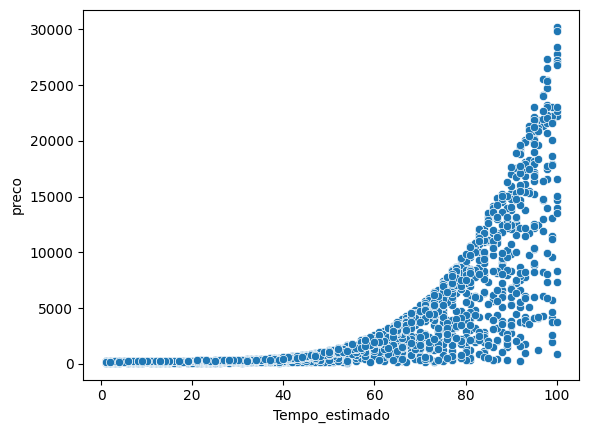

In [9]:
import seaborn as sns

sns.scatterplot(x="Tempo_estimado", y="preco", data=dados)

<Axes: xlabel='Tempo_estimado', ylabel='preco'>

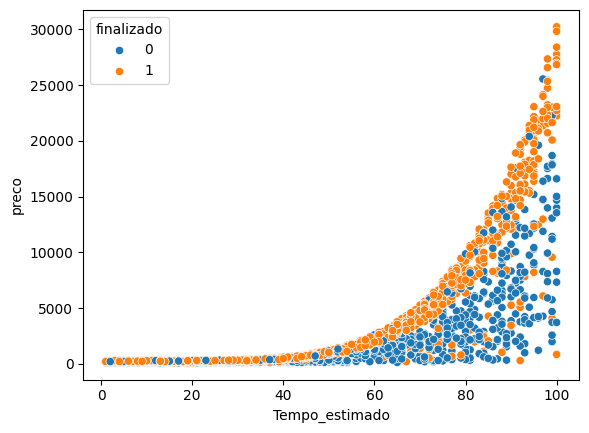

In [10]:
sns.scatterplot(x="Tempo_estimado", y="preco", hue="finalizado", data=dados)

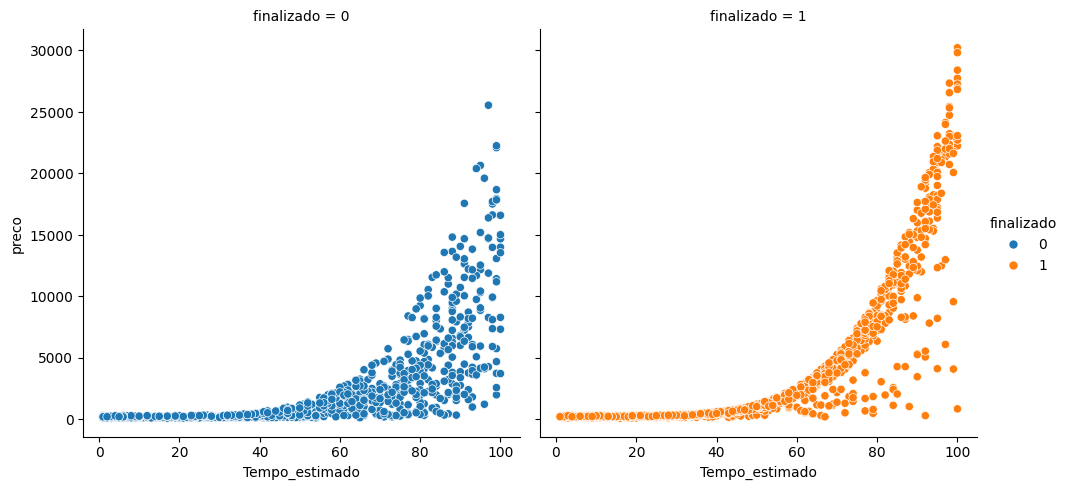

In [11]:
sns.relplot(x="Tempo_estimado", y="preco", hue="finalizado" ,col="finalizado", data=dados)

In [12]:
x = dados[["Tempo_estimado", "preco"]]
y = dados["finalizado"]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=SEED, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 54.44%


In [14]:
import numpy as np

previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base ) * 100
print("A acurácia de baseline foi de %.2f%%" % acuracia)

A acurácia de baseline foi de 52.59%


<Axes: xlabel='Tempo_estimado', ylabel='preco'>

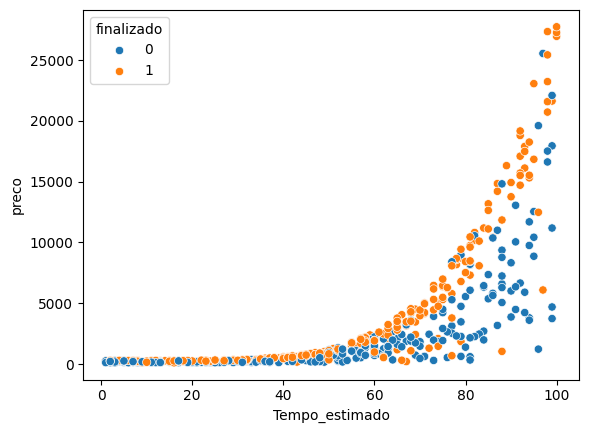

In [15]:
sns.scatterplot(x="Tempo_estimado", y="preco", hue=teste_y, data=teste_x)

In [16]:
x_min = teste_x.Tempo_estimado.min()
x_max = teste_x.Tempo_estimado.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [17]:
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)


In [18]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

In [19]:
pontos = np.c_[xx.ravel(), yy.ravel()]

In [20]:
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [21]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


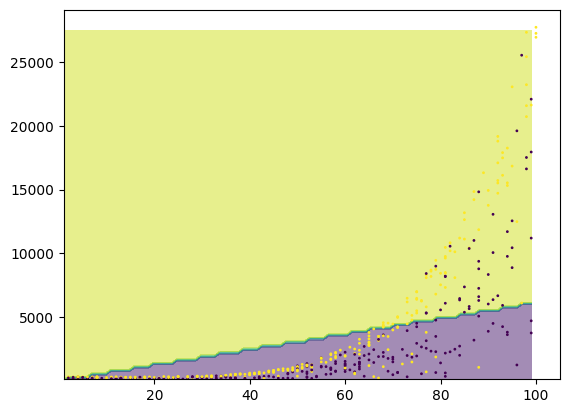

In [22]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.5)
plt.scatter(teste_x.Tempo_estimado, teste_x.preco, c=teste_y, s=1)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=SEED, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 53.15%


In [24]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state=SEED, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

scaler = StandardScaler()

scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 70.37%
